# Boosting和ADABoosting学习目标：
- 掌握Boosting集成思想
- 知道ADABoosting算法原理

---

# 1、Bagging和Boosting有哪些区别？
- 数据方面：Bagging采用有放回采样；Boosting采用全部数据，但是更加关注前一个弱学习器不足
- 投票方面：Bagging采用平权投票；Boosting采用加权投票
- 学习顺序：Bagging采用并行学习方式，每个学习器之间没有依赖关系；Boosting采用串行学习，学习有先后顺序

# 2、Boosting算法机制是什么？
Boosting算法机制（简言之：每新加入一个弱学习器，整体能力就会得到提升）：
- 先出初始训练集得到一个基学习器，并更句基学习器表现对样本分布进行调整（更关注做错样本），并应用于下一个基学习训练
- 如此重复，直到基学习器树木达到实现指定的值T为止，最后再将这T个基学习器加权结合得到集成学习器

Boosting算法存在问题：
- 在每一轮中如何调整训练集，使得训练集的弱分类器得以进行（调整样本权值）
- 如何在各个弱学习分类联合起来形成强分类器（调整模型权值）

# 3、什么是提升Boosting？

# 4、什么是AdaBoost，有哪些特点，实现步骤分别是？
- AdaBoost概念：Adaptive Boosting简称自适应提升，是Boosting算法的一种实现，是一种用于分类问题的算法，它用于弱分类器的线性组合来构造强分类器。
- AdaBoost特点（训练时样本具有权重，并且在训练过程中动态调整，被分错的样本会加大权重，算法更加难分的样本）：
    - 可以使用各种方法构建子分类器，AdaBoost算法提供框架
    - 子分类器容易构造
    - 速度快，且基本不用调参
    - 泛化错误率低
    
- AdaBoost实现步骤：
    - 初始化训练数据的权值分布：假设有N个样本，每个样本赋予相同的权值1/N
    - 训练弱分类器：在本轮训练中，某个样本被分错，则提高它的权值，襄樊分类正确的样本被降低权值，然后权值更新的过的全体样本被用于训练下一个分类器，使得下一个分类器更加关注中打的难分样本，多次迭代训练多个弱分类器
    - 加权组合弱分类器：鸡杂大分类误差率小的弱分类器的权重，使其在最终的表决中起到较大的作用，从而降低分类误差率的弱分类器的权重，时期在最终的表决中起到较小的作用
    




# 小结
- 集成技术与单独的分类器性能比较，集成学习提高了复杂度，但是在实践中需要衡量是否愿意为适度提高预测性能付出更多的计算成本。
- Boosting体现了提升思想，每一个训练器重点关注前一个训练器不足的地方进行训练，通过加权投票的方式得出测算结果
- AdaBoost是boosting家族算法中的一员，其主要是通过改变样本权重，来训练多个弱学习器，最后通过加权求和的方式得出预测结果。



In [2]:
# 导入Pandas数据分析模块（pandas 是基于NumPy 的一种工具）
import pandas as pd
# 导入numpy包
import numpy as np
# 导入matplotlib包
import matplotlib.pyplot as plt
# 导入数据划分包
from sklearn.model_selection import train_test_split
# 导入模块预处理包
from sklearn.preprocessing import LabelEncoder
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier
# 导入性能评估包
from sklearn.metrics import accuracy_score

# 1、加载数据
wine = pd.read_csv('../file/wine.data')
'''
    数据量：177条
    字段数量：17个
    包含数据类型：浮点型（11）、整型（3）
    为空字段：无
    占用内存：19.5kb
'''
print(f'数据信息：{wine.info()}')

# 2、修改字段名称
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
wine = wine[wine['Class label'] != 1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
数据信息：None


In [3]:
# 3、获取特征值和目标值
X = wine[['Alcohol', 'Hue']].values
y = wine['Class label'].values
print(f'特征值：{X[:2, ]}, \n目标值：{y[:2, ]}')

特征值：[[12.37  1.05]
 [12.33  1.25]], 
目标值：[2 2]


In [5]:
# 4、数据转换并划分测试集和训练集
# LabelEncoder 类用于将标签值（通常是字符串）转换为从0开始的连续整数
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
print(f'训练集 特征值：{X_train[:2]}, 目标值：{y_train[:2]}')
print(f'测试集 特征值：{X_test[:2]}, 目标值：{y_test[:2]}')

训练集 特征值：[[12.29  1.42]
 [12.08  0.93]], 目标值：[0 0]
测试集 特征值：[[13.23  0.56]
 [11.41  1.1 ]], 目标值：[1 0]


In [6]:
# 5、决策树模型，并评估性能
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
tree = tree.fit(X_train, y_train)

y_tree_train_predict = tree.predict(X_train)
tree_train_score = accuracy_score(y_train, y_tree_train_predict)
print(f'决策树-训练集得分： {tree_train_score:.3%} ')

y_tree_test_predict = tree.predict(X_test)
tree_test_score = accuracy_score(y_test, y_tree_test_predict)
print(f'决策树-测试集得分：  {tree_test_score:.3%} ')
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train_score, tree_test_score))

决策树-训练集得分： 84.507% 
决策树-测试集得分：  85.417% 
Decision tree train/test accuracies 0.845/0.854


In [7]:
# 6、在500棵单层决策树上训练AdaBoost模型，并性能评估
abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 500, learning_rate = 0.1, random_state = 0)
abc = abc.fit(X_train, y_train)

y_ada_train_predict = abc.predict(X_train)
ada_train_score = accuracy_score(y_train, y_ada_train_predict)
print(f'ADA-训练集得分： {ada_train_score:.3%} ')

y_ada_test_predict = abc.predict(X_test)
ada_test_score = accuracy_score(y_test, y_ada_test_predict)
print(f'ADA-测试集得分： {ada_test_score:.3%} ')
print('Decision tree train/test accuracies %.3f/%.3f' % (ada_train_score, ada_test_score))

/root/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ADA-训练集得分： 100.000% 
ADA-测试集得分： 87.500% 
Decision tree train/test accuracies 1.000/0.875


特征值 最大：14.88, 最小：10.45
目标值 最大：2.45, 最小：-0.52


/root/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


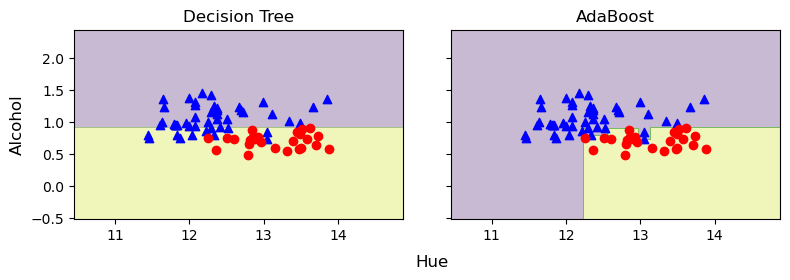

In [8]:
# 7、绘制决策区域形状
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
print(f'特征值 最大：{x_max}, 最小：{x_min}')
print(f'目标值 最大：{y_max}, 最小：{y_min}')

# 生成坐标网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# 创建一个一行二列子图/尺寸大小8*3/共享x和y轴， 返回值f为窗图引用变量，ax_arr 所包含子图的数组
f, ax_arr = plt.subplots(1, 2, sharex = 'col', sharey = 'row', figsize = (8, 3))

# 循环遍历创建子图
merge_arr = zip([0, 1], [tree, abc], ['Decision Tree', 'AdaBoost'])
for index, estimator, name in merge_arr:
    estimator.fit(X_train, y_train)

    # 将xx和yy数组展平（从多维数组变为一维数组）,将展开的xx，yy一维数组合并成二维数组
    merge_arr = np.c_[xx.ravel(), yy.ravel()]
    # 模型预测
    temp_predict = estimator.predict(merge_arr)
    # 将预测后的结果重新塑形为xx相同纬度
    reshape_predict = temp_predict.reshape(xx.shape)

    item = ax_arr[index]
    # 绘制xx,yy等高线图, alpha设置填充颜色透明度
    item.contourf(xx, yy, reshape_predict, alpha = 0.3)

    # 绘制散点图并设置标题

    # 获取标签为0的数据点x，y坐标，用三角形绘制图形
    x_zero_train = X_train[y_train == 0, 0]
    y_zero_train = X_train[y_train == 0, 1]
    item.scatter(x_zero_train, y_zero_train, c = 'blue', marker = '^' )

    # 获取标签为1的数据点x，y坐标，用圆形绘制图形
    x_one_train = X_train[y_train == 1, 0]
    y_one_train = X_train[y_train == 1, 1]
    item.scatter(x_one_train, y_one_train, c = 'red', marker = 'o' )
    # 设置子图标题
    item.set_title(name)

ax_arr[0].set_ylabel('Alcohol', fontsize = 12)
plt.text(10.2, -1.2, s = 'Hue', ha = 'center', va = 'center', fontsize = 12)
plt.tight_layout()